## Antes de começar...

Nessa prática, iremos entender melhor o conceito de Overfitting e underfitting além de ter o primeiro contato com um método de aprendizado de máquina supervisionado (Árvore de Decisão). Para isso, iremos usar a biblioteca [Scikit Learn](https://scikit-learn.org), além das bibliotecas que usamos na prática passada: pandas, matplotlib e numpy. Clique no código abaixo e pressione ctrl+enter para executá-lo.

Para isso, se necessário, instale tais bibliotecas usando `pip3 install pandas matplotlib numpy` (em alguns Sistemas Operacionais/configurações, você usará `pip` ao inves de `pip3`)

In [26]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt


### ...um pouquinho mais sobre 🐼🐼

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html">**Método drop**</a> Remove colunas ou linhas do dataframe. Utilize inplace=True para a modificação ocorrer no dataframe que está sendo modificado. Veja exemplo:

In [27]:
df = pd.DataFrame(
    np.arange(20).reshape(5, 4), columns=["ana", "bruna", "carol", "daniel"]
)
print(df)
print("\n\n depois de remover... \n\n")
print(df.drop(["carol", "daniel"], axis=1))

   ana  bruna  carol  daniel
0    0      1      2       3
1    4      5      6       7
2    8      9     10      11
3   12     13     14      15
4   16     17     18      19


 depois de remover... 


   ana  bruna
0    0      1
1    4      5
2    8      9
3   12     13
4   16     17


<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html">**Método sample**</a> Extrai uma amostra aleatória do Dataframe. Utilize random_state = "número inteiro" para que seja embaralhado sempre da mesma forma - importante para [reprodutibilidade dos resultados](https://pt.wikipedia.org/wiki/Reprodutibilidade). Além disso, você pode remover a amostra selecionada da amostra original por meio dos índices (precisam ser únicos).

In [28]:
df_sample = df.sample(frac=0.6, random_state=1)
df_sample


,ana,bruna,carol,daniel
2,8,9,10,11
1,4,5,6,7
4,16,17,18,19


Remoção da amostra selecionada:

In [29]:
df_retirando_sample = df.drop(df_sample.index)
df_retirando_sample


,ana,bruna,carol,daniel
0,0,1,2,3
3,12,13,14,15


## Overfitting - Exemplo Ilustrativo

A principio, vamos fazer um dataset artificial em que possuimos dois atributos (também chamado de caracteríscas ou, do inglês, *features*) e duas possíveis saídas (também chamado de valor alvo ou classe alvo). Para isso, temos a matriz `x` e o vetor `y` em que, para cada exemplo `i`, cada linha `x[i]` dessa matriz representa esse exemplo (neste caso, representado por dois atributos) e a classe alvo `y[i]`.

Veja o dataset:

In [30]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(400, noise=0.25)
x[:10]  # 10 primeiras linhas da matriz X

array([[-0.49511301,  0.96602758],
       [ 1.71424117, -0.49933902],
       [ 1.3702969 , -0.37944818],
       [-1.11477769,  0.16771336],
       [-0.13290417, -0.14821564],
       [ 0.62307375,  0.86983696],
       [-0.91762377,  0.58061579],
       [ 0.07292557, -0.44423885],
       [-0.74499852,  0.89696524],
       [-0.26472071,  0.47607795]])

In [31]:
y[:10]  # lista com 10 primeiros itens do vetor y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

Nessa e nas demais práticas, iremos representar a classe alvo como um vetor `y` e, os atributos, pela matriz `x`.

Abaixo, podemos ver a representação gráfica deste dataset em que, para cada instancia `i`, o eixo x é o atributo `x[i][0]` e o eixo y é o atributo `x[i][1]` a classe alvo `y[i]` é representada pela cor.

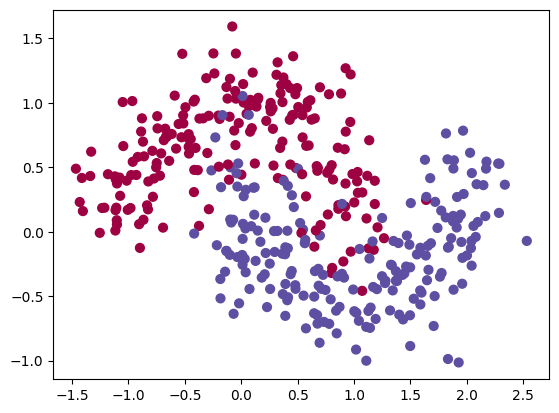

In [32]:
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=plt.cm.Spectral)

Inicialmente, no aquivo `arvore_de_decisao.py` implemente a função `cria_modelo`. Veja a seguir as instruções de como implementá-la.

Nessa função, você deverá criar um modelo baseado em arvore de decisão, por meio de um treino. Para o treino, use a variável `x` (que pode ser uma matriz ou DataFrame) em que, cada linha, é uma instância representada pelos seus atributos, além disso, a `y` é um vetor ou Series  representando a classe alvo  de cada instância. Coloque como `random_state=1` que é o seed (semente) da função aleatória usada, pois, por padrão, a árvore de decisão do Scikit learn obtém os dados de forma aleátoria. Definindo este parametro, garantimos que o resultado será o mesmo em todas as execuções.

Além disso, com o objetivo de avaliarmos o overfitting, essa função possuirá o parametro `min_samples_split` que 
 que define o mínimo de exemplos necessários para que um nodo da árvore efetue a divisão. Use esse parâmetro ao instanciar a Árvore de Decisão. 

Para implementar essa função, use a classe `DecisionTreeClassifier`. [Veja a documentação desta classe](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Se necessário, comente a importação abaixo, copie e cole a função aqui e, logo após, volte ela para o arquivo. Para criar/obter o modelo use o [método fit](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit).  Após implementar, execute o teste abaixo.

In [33]:
!python3 -m tests TestDecisionTree.test_cria_modelo


.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


Logo após, execute o código abaixo para importar a função criada. Lembre-se de reiniciar o kernel caso faça alguma modificação na mesma após importar.

In [34]:
from arvore_decisao import cria_modelo


Abaixo, crie um modelo utilizando o dataset criado anteriormente com a função make_moons e use a função `plot_decision_boundary` para gerar o grafico apresentado o dataset ilustrativo com a superfície de decisão do modelo criado. Essa função está no arquivo `util.py`.

Na criação do modelo, altere o parametro `min_samples` até um valor que você julgue adequado. Veja o *overfitting* em valores muito baixos (abaixo de 1%, principalmente) e *underfitting* em valores muito altos. Como usualmente implementada, a porcentagem nesta função é um valor entre 0 e 1 em que 1 representa 100% 0.5, por exemplo, representa 50%.

In [37]:
from util import plot_decision_boundary

plot_decision_boundary(cria_modelo(x, y, 0.00010), x, y)


[[-4.95113011e-01  9.66027577e-01]
 [ 1.71424117e+00 -4.99339023e-01]
 [ 1.37029690e+00 -3.79448177e-01]
 [-1.11477769e+00  1.67713358e-01]
 [-1.32904169e-01 -1.48215645e-01]
 [ 6.23073748e-01  8.69836961e-01]
 [-9.17623769e-01  5.80615790e-01]
 [ 7.29255650e-02 -4.44238846e-01]
 [-7.44998524e-01  8.96965245e-01]
 [-2.64720708e-01  4.76077949e-01]
 [ 1.20782147e+00  3.39652557e-02]
 [-4.11552347e-01  1.02453674e+00]
 [-3.70872642e-01  8.78057147e-01]
 [ 1.65979609e+00 -2.95369699e-01]
 [ 9.04856078e-01 -2.30689285e-01]
 [ 8.84772379e-01  1.07237686e+00]
 [ 6.94224091e-01 -8.61345798e-01]
 [-4.66423269e-01  6.58525222e-01]
 [ 3.99710082e-02  3.25588088e-01]
 [-8.27115312e-01  1.73687286e-01]
 [-1.11620010e+00  9.33156378e-03]
 [ 1.27222260e-01 -2.26285034e-01]
 [-6.74422126e-01  7.99424760e-01]
 [ 1.49706220e+00 -2.76360127e-01]
 [-1.41314738e+00  4.17079935e-01]
 [ 1.34248614e+00 -4.55269579e-01]
 [ 2.55217094e-01  9.67298536e-01]
 [ 1.07185442e+00 -4.58551686e-01]
 [ 1.27746469e+00 -3

## Impacto do Overfitting/Underfitting - Estimativa Automática da Qualidade de Conteúdo

Nesta prática, iremos usar dados de 3.294 artigos da Wikipédia rotulados manualmente quanto a sua qualidade. 

Esses artigos passaram por uma avaliação pela comunidade de editores da Wikipedia. Tais editores classificaram esses artigos quanto a qualidade da seguinte forma: 

- **Artigo Destaque (FA)**: Os artigos atribuídos a esta classe são, de acordo com os avaliadores, os melhores artigos da Wikipédia.
- **Classe A (AC)**: os artigos da Classe A são considerados completos, mas com alguns problemas pendentes que precisam ser resolvidos para serem promovidos a Artigos em destaque.
- **Artigo Bons (GA)**: Bons Artigos são aqueles sem problemas de lacunas ou conteúdo excessivo. Essas são boas fontes de informação, embora outras enciclopédias possam fornecer um conteúdo melhor.
- **Classe B (BC)**: os artigos atribuídos a essa classe são considerados úteis para a maioria dos usuários, mas carecem de informações mais precisas.
- **Classe Inicial (ST)**: os artigos da Classe Inicial ainda estão incompletos, embora contenham referências e ponteiros para informações mais completas.
- **Artigos Rascunhos (SB)**: os artigos de toco são artigos de rascunho, com poucos parágrafos. Eles também têm poucas ou nenhumas citações.

Assim, [Dalip et. al. (2009)](https://dl.acm.org/citation.cfm?id=1555449) fizeram o preprocessamento desses artigos para serem extraídos indicadores de qualidades tais como: idade do artigo, tamanho, número de citações. Com tais indicadores e a classe de qualidade, foi possível realizar a predição automática de qualidade de artigos da Wikipédia.

Nesta prática, iremos fazer a previsão da qualidade usando os indicadores proposto por [Dalip et. al. (2009)](https://dl.acm.org/citation.cfm?id=1555449) e uma árvore de decisão.

Inicialmente, uso um DataFrame pandas e [leia o arquivo `wikipedia.csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) e exiba os dados deste dataset. Coloque como o rótulo da linha o id do artigo (ou seja, no dataset, a coluna `id` será a `index_col` do DataFrame).

In [11]:
df_wiki = pd.read_csv("wikipedia.csv")
df_wiki.set_index("id", inplace=True)
df_wiki

,realClass,\histAge,\histAgePerReview,\histReviewsPerUser,\histDiscussionCount,\histIPCount,\histReviewCount,\histUserCount,\histModifiedLinesRate,\histOccasionalUsersReviewsRate,...,\minAbsLen,\XLinksPerSec,\ssCount,\sCount,\numExtLink,\tamMaiorFrase,\avgSLen,\meanSubsectionPerSection,\LinksPerTLen,\avgPLen
id,,,,,,,,,,,,,,,,,,,,,
9915833,SB,1000.0,0.14,1.67,4.0,0.0,5.0,5.0,0.00,100.00,...,0.0,0.0000,0.0,0.0,0.0,19.0,0.000000e+00,0.0000,11.1209,9.3333
6044227,SB,1230.0,14.43,4.00,4.0,12.0,64.0,52.0,21.52,21.88,...,347.0,0.7500,0.0,4.0,3.0,40.0,7.167500e+02,0.0000,114.6800,62.7500
317070,GA,2271.0,1.39,2.53,30.0,373.0,856.0,483.0,16.10,26.17,...,553.0,0.2500,4.0,8.0,2.0,104.0,2.691500e+03,0.5000,169.5433,247.2222
9119240,FA,2852.0,0.49,2.64,147.0,1286.0,2635.0,1349.0,23.13,22.47,...,3847.0,2.4000,12.0,10.0,24.0,199.0,4.369400e+03,1.2000,170.0156,173.9231
14105,AC,2859.0,1.43,2.07,84.0,184.0,600.0,416.0,3.95,41.67,...,449.0,1.3333,9.0,6.0,8.0,163.0,4.666333e+03,1.5000,102.5568,111.3929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619852,GA,1547.0,0.68,7.35,166.0,267.0,840.0,573.0,34.16,9.40,...,1258.0,3.2000,6.0,5.0,16.0,254.0,6.397200e+03,1.2000,175.7473,283625.0000
286444,ST,2312.0,53.25,1.25,1.0,6.0,26.0,20.0,5.88,76.92,...,950.0,3.0000,0.0,1.0,3.0,31.0,1.458000e+03,0.0000,208.2857,38.0000
10560845,GA,967.0,6.20,3.95,18.0,6.0,89.0,83.0,7.14,24.72,...,675.0,0.4286,0.0,7.0,3.0,217.0,1.545143e+06,0.0000,152338.0000,256.6000


Antes de executar a classificação e verificar o acerto no treino e teste, você deverá implementar a função `divide_treino_teste` que está no arquivo `arvore_decisao.py`.

Essa função deverá dividir os dados, de forma aleatoria, em treino e teste.  Para isso, faça o seguinte: 

1. Crie o DataFrame `df_treino` por meio do Dataframe `df` e a proporção `val_proporcao_treino`, passados como parâmetro. `val_proporcao_treino` assume um valor de 0 a 1 em que, por exemplo, 0.8 representa que 80% das instancias serão de treino e, o restante, o teste. . O [método `sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) irá auxiliar para isso. Use como parâmetro `random_state=1`. Esse será o valor da semente (seed) da função aleatória para manter sempre os dados embaralhados da mesma forma (o teste automatizado só irá funcionar caso tenha colocado a esse valor de semente);

2. Conforme dito, o restante das instancias estarão em `df_teste`. Uma forma fácil de criar o `df_teste` é obter os elementos que estão em `df` e não estão em `df_treino`. Para isso, use [o método `drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) que elimina conlunas ou  linhas de um DataFrame. Para eliminar as linhas, obtenha o id de cada linha do treino usando `df_treino.index`.

Em Python uma função pode retornar mais de um elemento. Por exemplo:

In [12]:
def xuxu():
    a = 2
    b = 3
    return a, b


x, y = xuxu()
print(x)

2


Execute o seguinte testa para verificar a corretude de seu código: 

In [13]:
!python3 -m tests TestDecisionTree.test_divide_treino_teste


.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


A seguir, execute a função `divide_treino_teste` com uma divisão de 80% de treino e, logo após, usando df_treino e df_teste, crie as seguintes variáveis:
-  `x_treino` : DataFrame que representa, para cada linha do **treino**, todos os atributos de um exemplo do treino. Para isso, elimine a coluna que representa a classe por meio [método `drop` do DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), alterando o parametro axis;
- `y_treino`: Series que representa, para cada posição `i`, a classe alvo do exemplo `i` representado pelos atributos `x_treino[i]`. A classe alvo está na coluna `realClass`;
- `x_teste`: Similar ao `x_teste`, porém com as instancias do **teste**. 
- `y_teste`: Similar ao `y_treino`, porém, são as classe alvo do teste; 


In [14]:
from arvore_decisao import divide_treino_teste

# execute a função divide_treino_teste corretamente
df_treino, df_teste = divide_treino_teste(df_wiki, 0.8)

# instancias de treino - separe as features x da classe y
x_treino = df_treino.drop(["realClass"], axis="columns")
y_treino = df_treino["realClass"]

print(y_treino)

# instancias de teste - separe as features x da classe y
x_teste = df_teste.drop(["realClass"], axis="columns")
y_teste = df_teste["realClass"]

id
6322029    GA
1465185    GA
333380     AC
1377636    AC
377194     GA
           ..
206029     GA
2866352    ST
4218119    ST
6096310    BC
5889452    BC
Name: realClass, Length: 2635, dtype: object


Implemente agora o método `faz_classificacao`. Ele passará como parametro as variáveis `X_treino`, `y_treino`, `X_teste`, `y_teste`, criadas anteriormente além do parâmetro `min_samples` que define a quantidade mínima de instancias para que se divida um nodo da árvore de decisão.

Assim, esta função irá:

1- Criar o modelo a partir dos dados de treino e o parametro `min_samples` (você pode usar a função criada anteriormente);

2- Realizar a predição usando o [método predict](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict). Esse método retorna uma lista de predição em que, para cada posição `i`, retorna o resultado previsto do exemplo representado por `x_teste[i]`;

3- A partir da lista obtida pela predição e da variável `y_teste`, calcule a `acuracia` que é a proporção de acertos, ou seja, $acuracia = acertos/|y_{teste}|$ em que `acertos` é a quantidade de acertos da predição e $y_{teste}$ é a lista `y_teste`.

Dicas:
- caso tenhamos duas listas `a` e `b`, ao fazer a operação `a==b`, ele retornará uma lista em que o valor  de cada posição será igual a verdadeiro caso `a==b`.
- np.sum soma os valores de um vetor, caso os valores sejam booleanos, será considerado True=1 e False=0.


Logo após, execute o teste abaixo:

In [15]:
!python3 -m tests TestDecisionTree.test_faz_classificacao


.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


In [16]:
from arvore_decisao import faz_classificacao

y_predicted, acuracia = faz_classificacao(x_treino, y_treino, x_teste, y_teste, 0.8)

print("Acurácia: {0}".format(acuracia))

Acurácia: 0.3201820940819423


Por meio da função `plot_performance_min_samples` crie um gráfico em que o eixo `x` é a variação do parâmetro `min_samples` e, o eixo `y`, representará a acurácia. Você deverá veriar o `min_samples` de 0.001 até 0.7 de 0.01 em 0.01 passos. Esse gráfico possuirá duas linhas: representando a **acurácia no treino** durante a variação do `min_samples` e, a outra, a **acurácia do teste** com os diversos valores de `min_sample`.

- foi usada a função arange do numpy para o for (ao invés de range). Pois o range permite apenas passos com valores inteiros;
- para obter a acurácia no treino, o teste deverá possuir as mesmas instancias do treino;
- Para plotar foi usado o matplotlib veja: [https://matplotlib.org/users/pyplot_tutorial.html](https://matplotlib.org/users/pyplot_tutorial.html).

Execute abaixo a função plot_performance_min_samples usando as veriáveis X_treino,y_treino,X_teste,y_teste

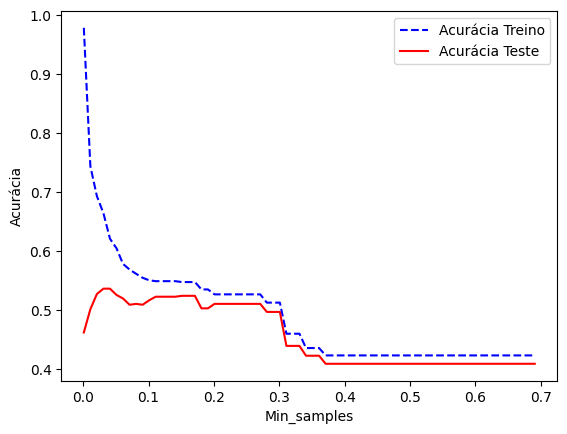

In [17]:
from arvore_decisao import plot_performance_min_samples

plot_performance_min_samples(x_treino, y_treino, x_teste, y_teste)


Escreva abaixo **um paragrafo** descrevendo o que pode ser visto no gráfico e quando há overfitting.

* Entre x = 0.0 e 0.1 é possível visualizar a ocorrência de um **overfitting** no qual ele aprendeu muito bem no treino, porém ele não foi bem no teste, ou seja, ele "sabe de mais".

* O ideal seria utilizar um **min_samples** entre 0.1 e 0.3, pois foi onde ele possuiu uma acuracia semelhante tanto no treino quanto no teste

* Há a occorrência de um **underfitting** em x = 0.4 a 0.7, pois ele não conseguiu aprender no treino e consequentemente não fez um bom teste.

Atenção! Nesta nossa prática, variamos o parametro no teste para ver o impacto da variável `min_samples_split` no mesmo. Porém,  caso quisessems comparar este classificador com outro, **não devemos usar informação do teste para construir o classificador** pois o teste deve reproduzir "o mundo real" e não saberiamos os valores do teste a priori.  

Assim, não é metodologicamente correto escolher um parâmetro pelo teste. Para resolver esse problema, poderemos ter uma partição de validação. 


**Opcional**: Divida os dados em 60% de treino, 20% de validação e 20% de teste. Use a partição de validação para descobrir o melhor parametro `min_samples` (melhor=maior acurácia). Por meio dele, treine o modelo e calcule o resultado no teste. Além da acurácia, use a função [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) para exibir outras métricas de avaliação disponíveis no Scikit Learn.

In [18]:
df_wiki_op = pd.read_csv("wikipedia.csv")
df_wiki_op.set_index("id", inplace=True)
df_wiki_op

treino_op, teste_op = divide_treino_teste(df_wiki_op, 0.6)

x_treino_op = treino_op.drop("realClass", axis=1)
y_treino_op = treino_op["realClass"]

x_teste_op = teste_op.drop("realClass", axis=1)
y_teste_op = teste_op["realClass"]

x_validacao_op = x_teste_op.sample(frac=0.5, random_state=1)
y_validacao_op = y_teste_op.sample(frac=0.5, random_state=1)

better_min_sample = 0
better_accuracy = 0

for min_sample_valid in np.arange(0.001, 0.9, 0.01):
    y_predict, accuracy = faz_classificacao(
        x_treino_op, y_treino_op, x_validacao_op, y_validacao_op, min_sample_valid
    )

    if accuracy > better_accuracy:
        better_accuracy = accuracy
        better_min_sample = min_sample_valid


teste_y_predict, teste_accuracy = faz_classificacao(
    x_treino_op, y_treino_op, x_teste_op, y_teste_op, better_min_sample
)

teste_accuracy

0.5242792109256449

**Opcional²** Como a qualidade pode ser encarada como uma nota em uma escala, modelar este problema como regressão pode ser melhor. Por isso, use [regressão e RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) e apresente o [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) obtido. Usando o treino e **validação** descubra o melhor valor para `min_samples_split`, apresente o grafico (similar ao da atividade que usamos da função `plot_decision_boundary`), e use o melhor parametro obtido na validação para o teste.







In [41]:
import sklearn.ensemble as en
import sklearn.metrics as met
from sklearn.decomposition import PCA

treino_op, teste_op = divide_treino_teste(df_wiki_op, 0.6)

x_treino_op = treino_op.drop("realClass", axis=1)
y_treino_op = treino_op["realClass"]

x_teste_op = teste_op.drop("realClass", axis=1)
y_teste_op = teste_op["realClass"]

# Mapeamento
map_realClass = {"FA": 5, "AC": 4, "GA": 3, "BC": 2, "ST": 1, "SB": 0}

y_treino_op = y_treino_op.map(map_realClass)
y_teste_op = y_teste_op.map(map_realClass)

#Regression
regression = en.RandomForestRegressor(max_depth=30, criterion='squared_error',
                                      min_samples_split=better_min_sample, random_state=1
                                      )
regression.fit(x_treino_op, y_treino_op)

y_predict_reg = regression.predict(x_teste_op)

mse = met.mean_squared_error(y_teste_op, y_predict_reg)
print(mse)

#Plot
# pca = PCA(random_state=1)
plot_decision_boundary(cria_modelo(x_treino_op, y_treino_op, better_min_sample), x_teste_op, y_teste_op)

# x_treino_2d = pca.fit_transform(x_treino_op)[:,:2]
# x_teste_2d = pca.fit_transform(x_teste_op)[:,:2]

# Por algum motivo o sistema crasha, nao consegui testar para ver se a conversão de dimensão deu certo
#plot_decision_boundary(cria_modelo(x_treino_2d, y_treino_op, better_min_sample), x_teste_2d, y_teste_op, True)



0.9072405971842814


MemoryError: Unable to allocate 122. GiB for an array with shape (48255, 338130) and data type float64